In [46]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [47]:
torch.cuda.is_available()

True

## Device

In [48]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Hyper-Parameter

In [49]:
input_size = 784
hidden_size = 500
num_class = 10
epochs = 5
batch_size = 100
lr = 0.001

## Load MNIST Dataset

In [50]:
train_dataset = torchvision.datasets.MNIST(root='../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=False)
test_dataset = torchvision.datasets.MNIST(root='../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

train dataset shape :  torch.Size([60000, 28, 28])
test dataset shape :  torch.Size([10000, 28, 28])


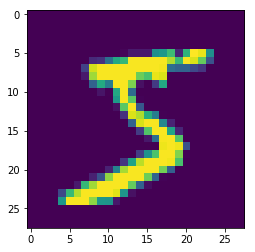

In [51]:
print('train dataset shape : ',train_dataset.data.shape)
print('test dataset shape : ',test_dataset.data.shape)
plt.imshow(train_dataset.data[0])

In [52]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

## Simple Model

In [53]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_class):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_class)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [57]:
model = NeuralNet(input_size,hidden_size,num_class).to(device)

## Loss and Optimizer

In [58]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)  

## Train

In [59]:
total_step = len(train_loader)

for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('EPOCH [{}/{}] STEP [{}/{}] Loss {: .4f})'
                  .format(epoch+1, epochs, i+1, total_step, loss.item()))

EPOCH [1/5] STEP [100/600] Loss  0.3138)
EPOCH [1/5] STEP [200/600] Loss  0.5084)
EPOCH [1/5] STEP [300/600] Loss  0.2166)
EPOCH [1/5] STEP [400/600] Loss  0.1116)
EPOCH [1/5] STEP [500/600] Loss  0.2192)
EPOCH [1/5] STEP [600/600] Loss  0.1350)
EPOCH [2/5] STEP [100/600] Loss  0.1667)
EPOCH [2/5] STEP [200/600] Loss  0.1507)
EPOCH [2/5] STEP [300/600] Loss  0.0499)
EPOCH [2/5] STEP [400/600] Loss  0.1375)
EPOCH [2/5] STEP [500/600] Loss  0.0915)
EPOCH [2/5] STEP [600/600] Loss  0.1274)
EPOCH [3/5] STEP [100/600] Loss  0.0808)
EPOCH [3/5] STEP [200/600] Loss  0.0310)
EPOCH [3/5] STEP [300/600] Loss  0.0487)
EPOCH [3/5] STEP [400/600] Loss  0.0699)
EPOCH [3/5] STEP [500/600] Loss  0.0465)
EPOCH [3/5] STEP [600/600] Loss  0.1670)
EPOCH [4/5] STEP [100/600] Loss  0.0331)
EPOCH [4/5] STEP [200/600] Loss  0.0278)
EPOCH [4/5] STEP [300/600] Loss  0.0671)
EPOCH [4/5] STEP [400/600] Loss  0.0842)
EPOCH [4/5] STEP [500/600] Loss  0.0896)
EPOCH [4/5] STEP [600/600] Loss  0.1194)
EPOCH [5/5] STEP

## Test

In [60]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 97.66 %


## save

In [61]:
torch.save(model.state_dict(), 'model.ckpt')